### Neural Network Model with a Single Perceptron and One Input Node

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression

2024-05-14 18:26:50.020077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X, y = make_regression(n_samples=30, n_features=1, random_state=1, noise=20)

X = X.T
y = np.reshape(y, (1, -1))

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(y.shape))

The shape of X is: (1, 30)
The shape of Y is: (1, 30)


In [3]:
def initialize_parameters(n_x, n_y):
    
    W = tf.Variable(tf.random.uniform((n_y, n_x)) * 0.5)
    b = tf.Variable(tf.random.uniform((n_y, 1)) * 0.5)

    return W, b

In [4]:
def forward_propagation(X, W, b):
    y_hat = W @ X + b
    return y_hat

In [5]:
def compute_cost(y, y_hat):
    cost = tf.reduce_mean((y - y_hat) ** 2) / 2
    return cost

In [6]:
def gradiant_descent(W, b, dj_dw, dj_db, learning_rate):
    W.assign_sub(learning_rate * dj_dw)
    b.assign_sub(learning_rate * dj_db)
    return W, b

In [7]:
def nn_model(X, y, n_x, n_y, epochs, learning_rate):
    W, b = initialize_parameters(n_x, n_y)
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_hat = forward_propagation(X, W, b)
            cost = compute_cost(y, y_hat)
            
            if epoch % 10 == 0:
                print(f'Epoch:{epoch}, Cost: {cost}')

        dj_dw, dj_db = tape.gradient(cost, [W, b])
        
        W, b = gradiant_descent(W, b, dj_dw, dj_db, learning_rate)

    W = W.numpy()
    b = b.numpy()
    return W, b

In [8]:
LEARNING_RATE = 0.05
EPOCHS = 200
n_x = X.shape[0]     # number of inputs
n_y = 1              # number of outputs

W, b = nn_model(X, y, n_x, n_y, EPOCHS, LEARNING_RATE)

2024-05-14 18:26:53.658184: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch:0, Cost: 779.2939453125
Epoch:10, Cost: 365.7998046875
Epoch:20, Cost: 220.5936737060547
Epoch:30, Cost: 169.39405822753906
Epoch:40, Cost: 151.2667694091797
Epoch:50, Cost: 144.8223114013672
Epoch:60, Cost: 142.52186584472656
Epoch:70, Cost: 141.6973419189453
Epoch:80, Cost: 141.4006805419922
Epoch:90, Cost: 141.29351806640625
Epoch:100, Cost: 141.25466918945312
Epoch:110, Cost: 141.2405242919922
Epoch:120, Cost: 141.23536682128906
Epoch:130, Cost: 141.23348999023438
Epoch:140, Cost: 141.23281860351562
Epoch:150, Cost: 141.23255920410156
Epoch:160, Cost: 141.23245239257812
Epoch:170, Cost: 141.23240661621094
Epoch:180, Cost: 141.23240661621094
Epoch:190, Cost: 141.23240661621094


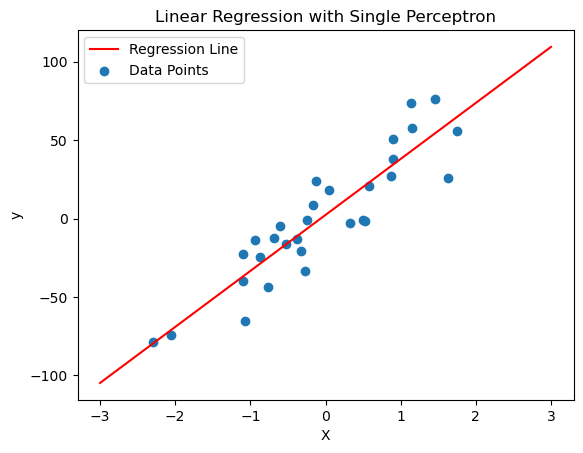

In [9]:
x = np.linspace(-3, 3, 50)
y_pred = W @ x.reshape(1, -1) + b

plt.plot(x, y_pred[0], c='r', label='Regression Line')
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Single Perceptron')
plt.legend()
plt.show()

### Neural Network Model with a Single Perceptron and Two Input Nodes

In [10]:
import seaborn as sns

from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('house_prices_train.csv', index_col='Id', na_filter=True)

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.corrwith(df['SalePrice']).sort_values()

ExterQual_TA        -0.589044
KitchenQual_TA      -0.519298
BsmtQual_TA         -0.452394
GarageFinish_Unf    -0.410608
GarageType_Detchd   -0.354141
                       ...   
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000
Length: 245, dtype: float64

In [13]:
df[['OverallQual', 'GrLivArea']] # these two columns has highest correlation with SalePrice

,OverallQual,GrLivArea
Id,,
1,7,1710
2,6,1262
3,7,1786
4,7,1717
5,8,2198
...,...,...
1456,6,1647
1457,6,2073
1458,7,2340


In [14]:
X = df[['OverallQual', 'GrLivArea']]
y = df['SalePrice']

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

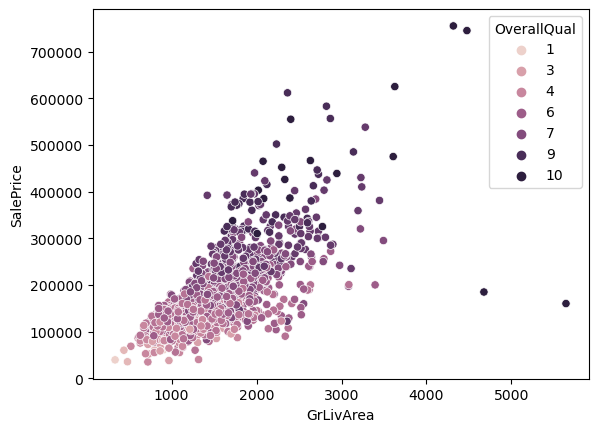

In [15]:
sns.scatterplot(data=X, x='GrLivArea', y=y, hue='OverallQual')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train_norm = ((X_train - X.mean()) / X.std()).T.to_numpy()
X_test_norm = ((X_test - X.mean()) / X.std()).T.to_numpy()
y_train_norm = (y_train - y.mean()) / y.std()
y_train_norm = np.reshape(y_train_norm, (1, -1))
y_test = np.reshape(y_test, (1, -1))

In [18]:
LEARNING_RATE = 0.05
EPOCHS = 100
n_x = X_train_norm.shape[0]     # number of inputs
n_y = 1                         # number of outputs

W, b = nn_model(X_train_norm, y_train_norm, n_x, n_y, EPOCHS, LEARNING_RATE)

Epoch:0, Cost: 0.33624646067619324
Epoch:10, Cost: 0.19294331967830658
Epoch:20, Cost: 0.15834856033325195
Epoch:30, Cost: 0.1485174149274826
Epoch:40, Cost: 0.14501211047172546
Epoch:50, Cost: 0.14343827962875366
Epoch:60, Cost: 0.14260071516036987
Epoch:70, Cost: 0.14210814237594604
Epoch:80, Cost: 0.14180278778076172
Epoch:90, Cost: 0.14160826802253723


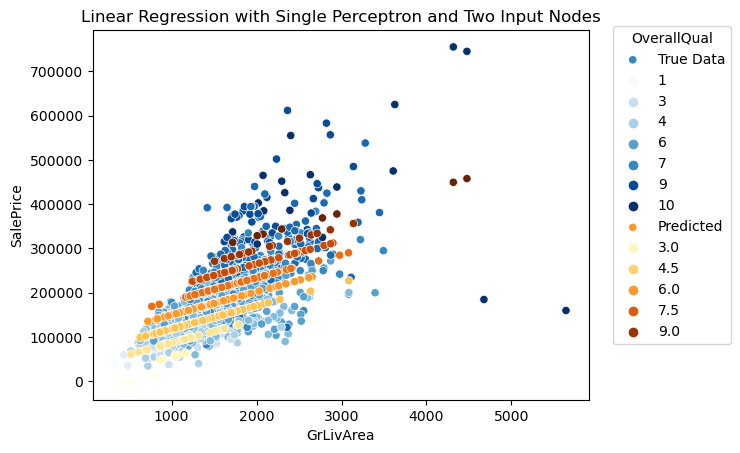

In [19]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='Blues', label='True Data')

y_values_norm = W @ X_test_norm + b 
y_values = y_values_norm * y.std() + y.mean()

df2 = pd.DataFrame(np.hstack([X_test, y_values.T]), columns=['OverallQual', 'GrLivArea', 'SalePrice'])
sns.scatterplot(data=df2, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='YlOrBr', label='Predicted')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression with Single Perceptron and Two Input Nodes')
plt.legend(title='OverallQual',loc=(1.05, 0.15))
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test.T, y_values.T))
print(f'RMSE : {RMSE}')
print(f'R2 Score: {r2_score(y_test.T, y_values.T)}')

RMSE : 43265.161599656974
R2 Score: 0.7450245987031403
